In [29]:
import MDAnalysis as mda
import numpy as np
from mdcraft.analysis.polymer import EndToEndVector, Gyradius
from matplotlib import pyplot as plt

# Load Trajectory

In [45]:
u = mda.Universe('../samples/input.data', '../samples/drop.lammpstrj',format='LAMMPSDUMP')
ag = u.select_atoms('type 1 or type 2 or type 3')

# Radius of Gyration

In [60]:
gyr = Gyradius(ag,n_chains=1,n_monomers=40, unwrap=True)

In [61]:
gyr.run()

  0%|          | 0/3001 [00:00<?, ?it/s]

/home/pjwalker/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


(0.0, 3000.0)

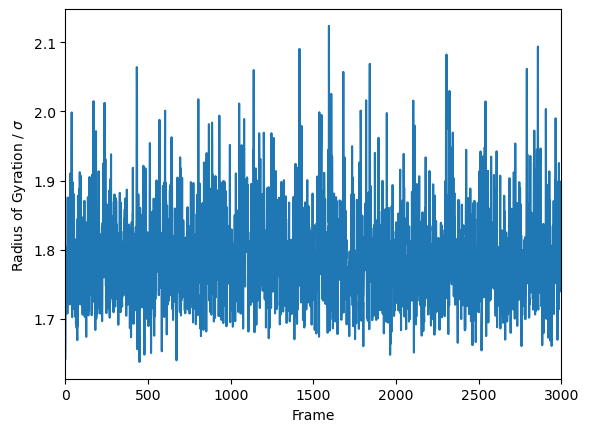

In [66]:
plt.plot(gyr.results.gyradii[0])
plt.xlabel('Frame')
plt.ylabel(f'Radius of Gyration / $\sigma$')
plt.xlim(0,3000)

# End-to-end Vector

In [67]:
e2e = EndToEndVector(ag,n_chains=1,n_monomers=40, unwrap=True)

/home/pjwalker/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/base.py:721: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


In [69]:
e2e.run()

  0%|          | 0/3001 [00:00<?, ?it/s]

/home/pjwalker/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


0it [00:00, ?it/s]

In [70]:
abs_e2e = np.zeros(len(e2e._e2e))

for i in range(len(e2e._e2e)):
    abs_e2e[i] = np.linalg.norm(e2e._e2e[i])

abs_e2e

array([1.96209354, 3.36105366, 2.70980697, ..., 2.10962735, 1.81927905,
       2.04331362])

(0.0, 3000.0)

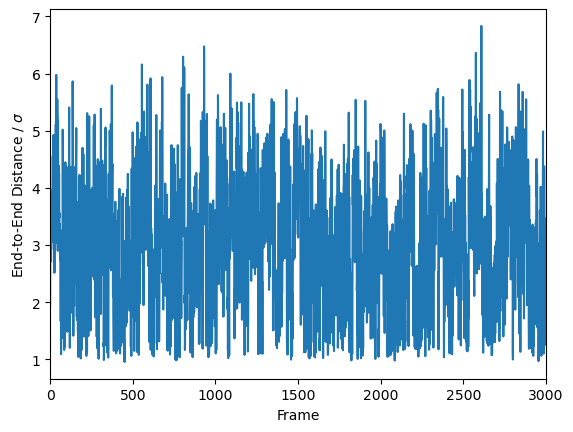

In [72]:
plt.plot(e2e.results.times,abs_e2e)
plt.xlabel('Frame')
plt.ylabel('End-to-End Distance / $\sigma$')
plt.xlim(0,3000)

/tmp/ipykernel_48598/900919511.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,3000)


(0.6701066645934385, 3000)

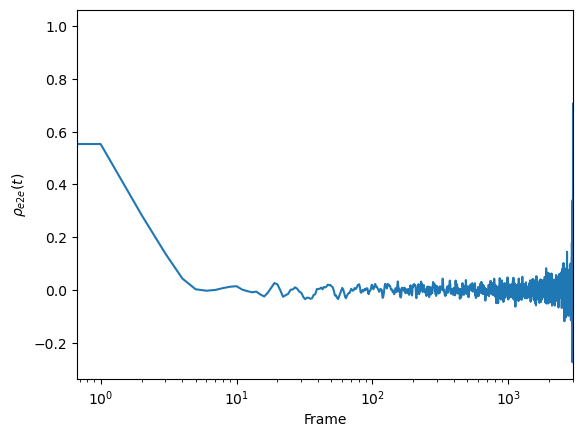

In [78]:
plt.semilogx(e2e.results.times,e2e.results.acf[0][0])
plt.xlabel('Frame')
plt.ylabel(r'$ \rho_{e2e}(t)$')   
plt.xlim(0,3000)